In [11]:
"""Run an simple experiment locally without using config file.

This file is presented as a very simple entry point to code.
For running any meaningful experiments, we suggest `batch_runner.py` or
`local_runner.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg
from plotnine import *

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS, DriftingFiniteBernoulliBanditTS, FiniteBernoulliBanditLangevin

from finite_arm.env_finite import DriftingFiniteArmedBernoulliBandit, FiniteArmedBernoulliBandit

sys.path.append(os.getcwd())

##############################################################################
# Running a single experiment

probs = [0.7, 0.8, 0.9, 0.2, 0.34, 0.77, 0.01]
n_arm = len(probs) 
n_steps = 1000
seed = 0

agent = FiniteBernoulliBanditLangevin(n_arm)
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(
    agent,
    env,
    n_steps=1000,
    seed=seed,
    unique_id='example'
)

experiment.run_experiment()

##############################################################################
# Simple display / plot of results

experiment.results.head()

series = ['prob{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='prob',
    value_name='count'
)

posterior_means = (ggplot(df) + aes('t', 'count', color='prob', group='prob') + geom_point() +
 geom_line())


Index([u'action', u'cum_regret', u'instant_regret', u'pmean', u'prob0',
       u'prob1', u'prob2', u'prob3', u'prob4', u'prob5', u'prob6', u't',
       u'unique_id'],
      dtype='object')


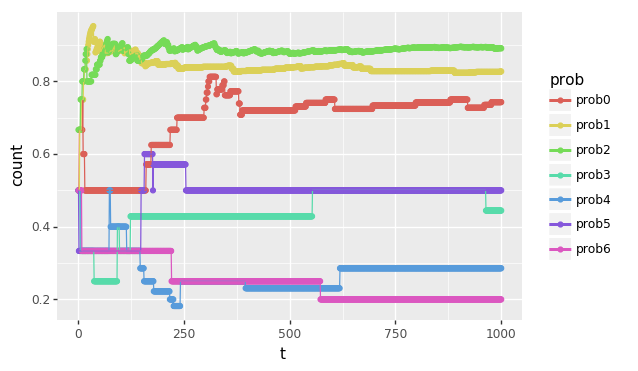

<ggplot: (8731380276417)>

In [12]:
display(posterior_means)

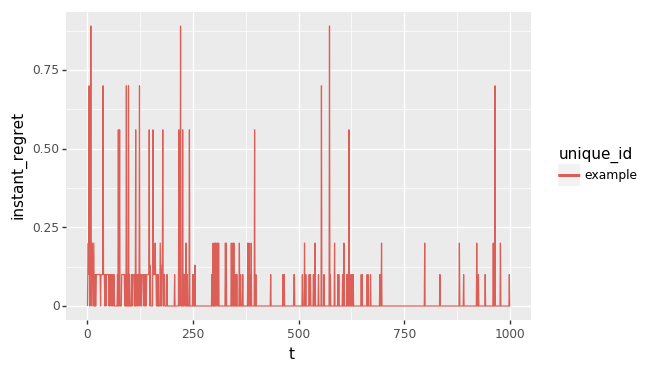

<ggplot: (8731380264793)>


In [13]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)

,category,series 1,series 2,series 3,series 4,series 5
0,QTR1,1,2,3,4,5
1,QTR2,7,8,9,10,11
2,QTR3,12,13,14,15,16
3,QTR4,17,18,19,20,21


,category,series,count
0,QTR1,series 1,1
1,QTR2,series 1,7
2,QTR3,series 1,12
3,QTR4,series 1,17
4,QTR1,series 2,2
5,QTR2,series 2,8
6,QTR3,series 2,13
7,QTR4,series 2,18
8,QTR1,series 3,3
9,QTR2,series 3,9


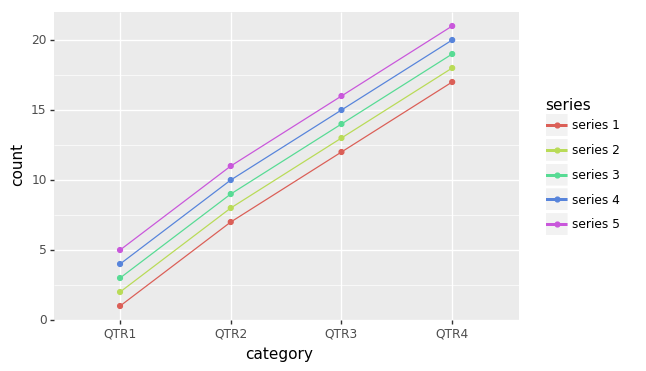

<ggplot: (8731383031921)>

In [4]:
from io import StringIO
import pandas as pd
from plotnine import *

# Read data into dataframe
io = StringIO(
u'''category "series 1" "series 2" "series 3" "series 4" "series 5"
QTR1 1 2 3 4 5
QTR2 7 8 9 10 11
QTR3 12 13 14 15 16
QTR4 17 18 19 20 21
''')
data = pd.read_csv(io, sep=' ')

display(data)

# Covert to tidy data
series = ['series {}'.format(i) for i in range(1, 6)]
df = data.melt(id_vars=['category'], value_vars=series, var_name='series', value_name='count')

display(df)

# Plot
(ggplot(df)
 + aes('category', 'count', color='series', group='series')
 + geom_point()
 + geom_line())